Source of theis notebook:
https://github.com/susanli2016/Machine-Learning-with-Python.git


<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [1]:
import pandas as pd

/var/folders/sp/j3p6g91d6dj8wzlq0vy4dw8r0000gn/T/ipykernel_24213/2035458946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [139]:
ser = pd.Series([100, 'foo', 300, 'bar', 500,600], ['tom', 'bob', 'nancy', 'dan', 'eric','eric'])

In [124]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
eric     600
dtype: object

In [136]:
ser = pd.Series([100, 'foo', 300, 'bar', 500])

In [130]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric', 'eric'], dtype='object')

In [133]:
ser.loc["eric"]

eric    500
eric    600
dtype: object

In [138]:
ser.loc[[0,1,2]]

0    100
1    foo
2    300
dtype: object

In [24]:
ser.iloc[2]

300

In [9]:
ser.iloc["nancy"]


TypeError: Cannot index by location index with a non-integer key

In [25]:
ser


tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [140]:
'bob' in ser

True

In [141]:
'bob' in ser.index


True

In [142]:
'foo' in ser


False

In [143]:
'foo' in ser.values


True

In [145]:
['hello',2000] * 2

['hello', 2000, 'hello', 2000]

In [144]:
ser * 2

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
eric       1200
dtype: object

In [146]:
'hello'*2

'hellohello'

In [148]:
ser[['nancy',"bob", 'eric']] ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [ ]:
ser

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [149]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [150]:
df = pd.DataFrame(d)
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [151]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [152]:
df.columns

Index(['one', 'two'], dtype='object')

In [38]:
pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock','tfdwuke'])

ValueError: Length of values (3) does not match length of index (4)

In [153]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple','xxx','yyy'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0
xxx,NaN,NaN
yyy,NaN,NaN


In [154]:
pd.Series([['a',"b"], ["wetw","sere"]], index=['dancy', 'ball',])


dancy          [a, b]
ball     [wetw, sere]
dtype: object

In [155]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple','asopgnsp'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN
asopgnsp,NaN,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [156]:
data = [{'alex': 1, 'joe': [2,3]}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [157]:
pd.DataFrame(data)

,alex,joe,ema,dora,alice
0,1.0,"[2, 3]",NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [158]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,joe,ema,dora,alice
orange,1.0,"[2, 3]",NaN,NaN,NaN
red,NaN,NaN,5.0,10.0,20.0


In [159]:
pd.DataFrame(data, columns=['joe', 'dora','alice', 'dsfhdrh'])

,joe,dora,alice,dsfhdrh
0,"[2, 3]",NaN,NaN,NaN
1,NaN,10.0,20.0,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [160]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [161]:
type(df['one'])

pandas.core.series.Series

In [163]:
df['one']['apple']

100.0

In [164]:
df['one'].dtype


dtype('float64')

In [165]:
df['threewetr'] = df['one'] * 2
df

,one,two,threewetr
apple,100.0,111.0,200.0
ball,200.0,222.0,400.0
cerill,NaN,333.0,NaN
clock,300.0,NaN,600.0
dancy,NaN,4444.0,NaN


In [167]:
df['one241s'] ="hello"


In [168]:
df

,one,two,threewetr,ones,one241s
apple,100.0,111.0,200.0,1,hello
ball,200.0,222.0,400.0,1,hello
cerill,NaN,333.0,NaN,1,hello
clock,300.0,NaN,600.0,1,hello
dancy,NaN,4444.0,NaN,1,hello


In [169]:
df['flag'] = df['one'] > 250
df

,one,two,threewetr,ones,one241s,flag
apple,100.0,111.0,200.0,1,hello,False
ball,200.0,222.0,400.0,1,hello,False
cerill,NaN,333.0,NaN,1,hello,False
clock,300.0,NaN,600.0,1,hello,True
dancy,NaN,4444.0,NaN,1,hello,False


In [170]:
three = df.pop('threewetr')

In [171]:
three

apple     200.0
ball      400.0
cerill      NaN
clock     600.0
dancy       NaN
Name: threewetr, dtype: float64

In [172]:
df

,one,two,ones,one241s,flag
apple,100.0,111.0,1,hello,False
ball,200.0,222.0,1,hello,False
cerill,NaN,333.0,1,hello,False
clock,300.0,NaN,1,hello,True
dancy,NaN,4444.0,1,hello,False


In [173]:
del df['two']

In [174]:
df

,one,ones,one241s,flag
apple,100.0,1,hello,False
ball,200.0,1,hello,False
cerill,NaN,1,hello,False
clock,300.0,1,hello,True
dancy,NaN,1,hello,False


In [175]:
df.insert(2, 'copy_of_one', df['one'])
df

,one,ones,copy_of_one,one241s,flag
apple,100.0,1,100.0,hello,False
ball,200.0,1,200.0,hello,False
cerill,NaN,1,NaN,hello,False
clock,300.0,1,300.0,hello,True
dancy,NaN,1,NaN,hello,False


In [177]:
df['one_upper_half'] = df['one'][:2]
df

,one,ones,copy_of_one,one241s,flag,one_upper_half
apple,100.0,1,100.0,hello,False,100.0
ball,200.0,1,200.0,hello,False,200.0
cerill,NaN,1,NaN,hello,False,NaN
clock,300.0,1,300.0,hello,True,NaN
dancy,NaN,1,NaN,hello,False,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset**. Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

er. 



In [10]:
import zipfile
import urllib.request
import os
 
url = 'https://files.grouplens.org/datasets/movielens/ml-20m.zip'
filename = '../data/movielens.zip'
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('../data')


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [178]:
movies = pd.read_csv('../data/ml-20m/movies.csv', sep=',')
print(type(movies))
movies.head(15)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [179]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('../data/ml-20m/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [185]:
ratings = pd.read_csv('../data/ml-20m/ratings.csv',encoding='utf-8', nrows=20,sep=',',decimal='.',usecols=['userId', 'movieId','rating'])
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [186]:
ratings.columns


Index(['userId', 'movieId', 'rating'], dtype='object')

In [187]:
# For current analysis, we will remove timestamp (we will come back to it!)

#del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [74]:
#Extract 0th row: notice that it is in fact a Series

row_0 = tags.loc[0]

In [75]:
type(row_0)

pandas.core.series.Series

In [76]:
row_0

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object

In [77]:
col_0 = tags.iloc[:,0]
type(col_0)

pandas.core.series.Series

In [78]:
row_0

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object

In [79]:
col_0

0             18
1             65
2             65
3             65
4             65
           ...  
465559    138446
465560    138446
465561    138446
465562    138446
465563    138472
Name: userId, Length: 465564, dtype: int64

In [ ]:
row_0.index

In [ ]:
col_0.index

In [ ]:
'userId' in row_0.index

In [ ]:
row_0['userId']

In [ ]:
'rating' in row_0

In [ ]:
row_0.name

In [ ]:
col_0.name

In [ ]:
row_0 = row_0.rename('first_row')
row_0.name

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [ ]:
tags.head()

In [ ]:
tags.index

In [ ]:
tags.columns

In [ ]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [84]:
ratings['userId'].unique()


array([1])

In [188]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [189]:
ratings['rating'].describe()

count    20.000000
mean      3.675000
std       0.293571
min       3.000000
25%       3.500000
50%       3.500000
75%       4.000000
max       4.000000
Name: rating, dtype: float64

In [ ]:
type(ratings['rating'])

In [190]:
ratings.describe()

,userId,movieId,rating
count,20.0,20.00000,20.000000
mean,1.0,303.25000,3.675000
std,0.0,248.05748,0.293571
min,1.0,2.00000,3.000000
25%,1.0,96.50000,3.500000
50%,1.0,276.50000,3.500000
75%,1.0,410.50000,4.000000
max,1.0,919.00000,4.000000


In [ ]:
a=ratings.describe()


In [ ]:
a

In [ ]:
ratings['rating'].mean()

In [ ]:
ratings.mean()==a.iloc['mean']

In [ ]:
ratings['rating'].min()

In [ ]:
a.loc['min']['rating']

In [ ]:
a['rating'].loc['min']


In [ ]:
ratings['rating'].max()

In [ ]:
ratings['rating'].std()

In [ ]:
ratings['rating'].mode()

In [192]:
ratings['userId'].unique()

array([1])

In [191]:
ratings.corr()

,userId,movieId,rating
userId,NaN,NaN,NaN
movieId,NaN,1.000000,-0.159273
rating,NaN,-0.159273,1.000000


In [193]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: rating, dtype: bool


False

In [194]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [87]:
movies.shape

(27278, 3)

In [195]:
movies.isnull()


,movieId,title,genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
27273,False,False,False
27274,False,False,False
27275,False,False,False
27276,False,False,False


In [197]:
#is any row NULL ?

movies.isnull().any().any()

False

Thats nice ! No NULL values !

In [94]:
ratings.shape

(20, 3)

In [95]:
#is any row NULL ?

ratings.isnull().any()

userId     False
movieId    False
rating     False
dtype: bool

Thats nice ! No NULL values !

In [96]:
tags.shape

(465564, 3)

In [97]:
#is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag         True
dtype: bool

We have some tags which are NULL.

In [198]:
tags = tags.dropna()

In [199]:
#Check again: is any row NULL ?

tags.isnull().any()

userId     False
movieId    False
tag        False
dtype: bool

In [ ]:
tags.shape

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

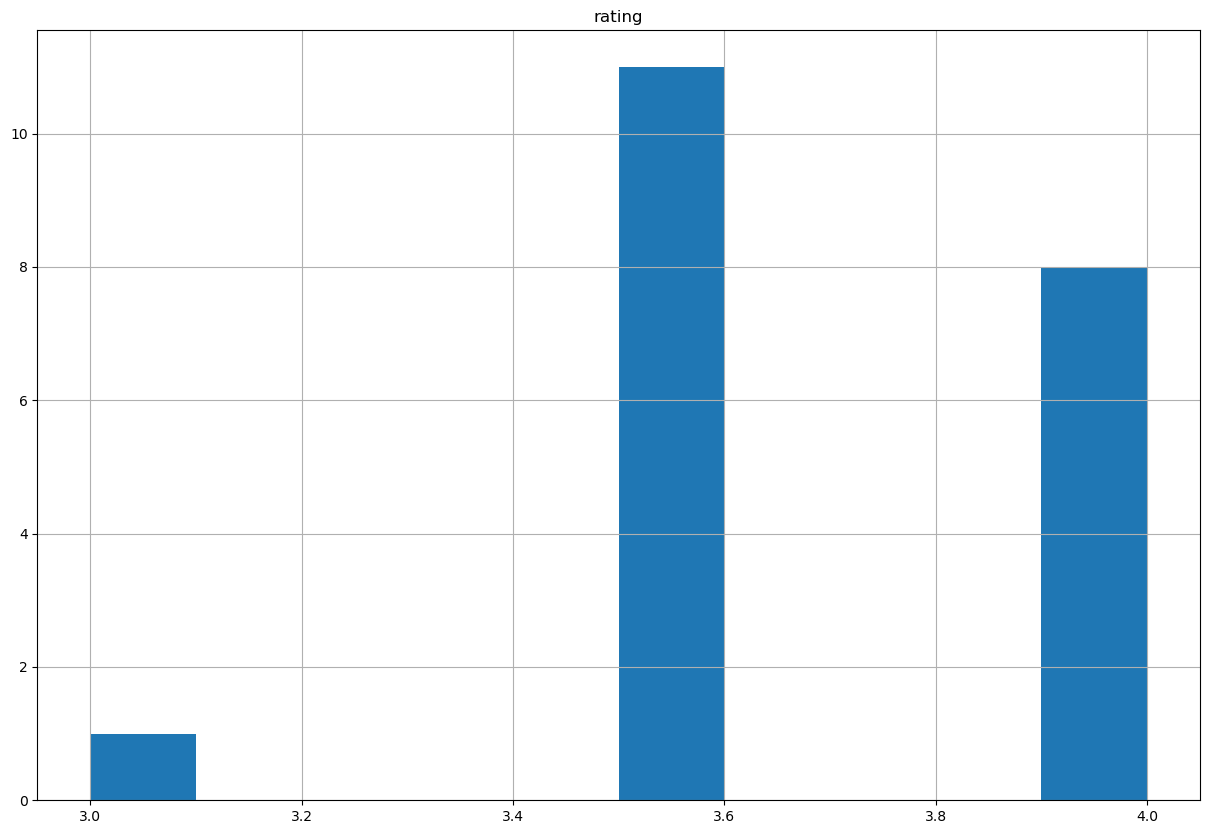

In [100]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

In [101]:
ratings.tail()

,userId,movieId,rating
15,1,541,4.0
16,1,589,3.5
17,1,593,3.5
18,1,653,3.0
19,1,919,3.5


<Axes: >

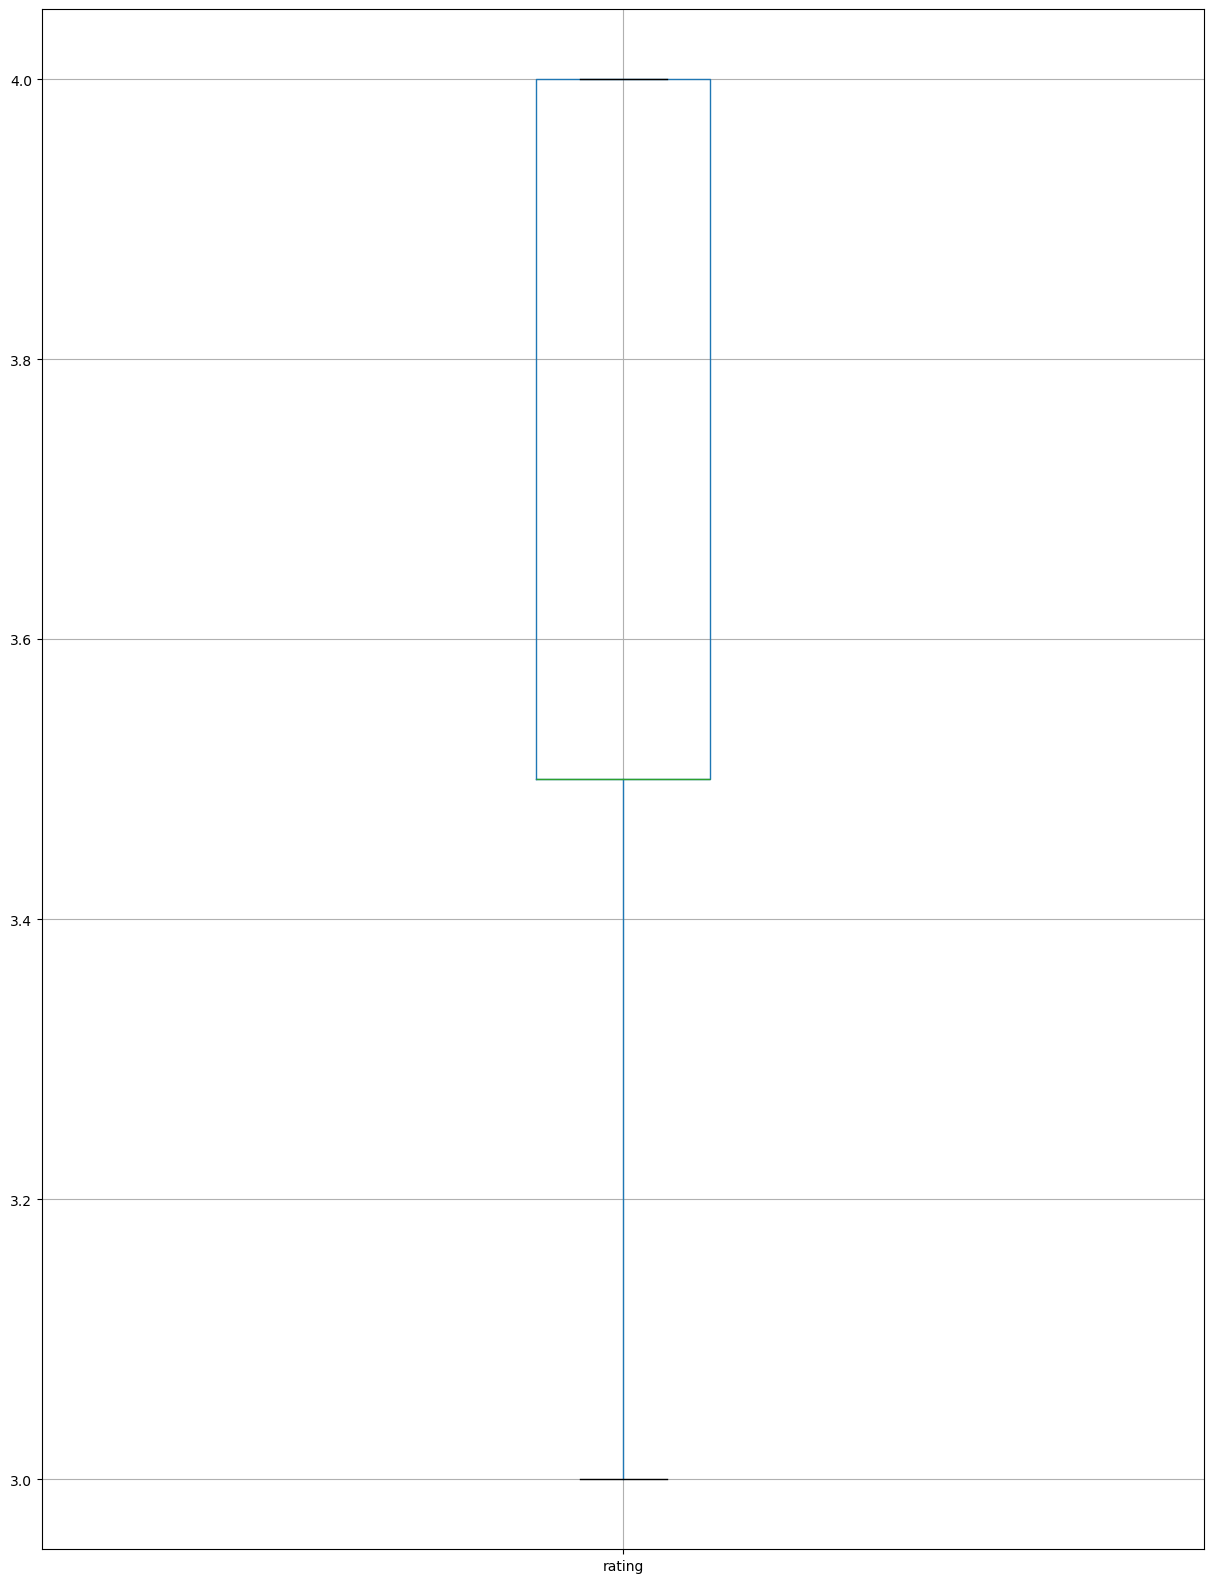

In [200]:
ratings.boxplot(column='rating', figsize=(15,20))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [201]:
tags['tag'].head(10)

0         Mark Waters
1           dark hero
2           dark hero
3       noir thriller
4           dark hero
5           bollywood
6    screwball comedy
7       noir thriller
8                mars
9            neo-noir
Name: tag, dtype: object

In [105]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [107]:
ratings[-10:]

,userId,movieId,rating
10,1,293,4.0
11,1,296,4.0
12,1,318,4.0
13,1,337,3.5
14,1,367,3.5
15,1,541,4.0
16,1,589,3.5
17,1,593,3.5
18,1,653,3.0
19,1,919,3.5


In [108]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [109]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

tag
missing child                    1
Ron Moore                        1
Citizen Kane                     1
mullet                           1
biker gang                       1
Paul Adelstein                   1
the wig                          1
killer fish                      1
genetically modified monsters    1
topless scene                    1
Name: count, dtype: int64

<Axes: xlabel='tag'>

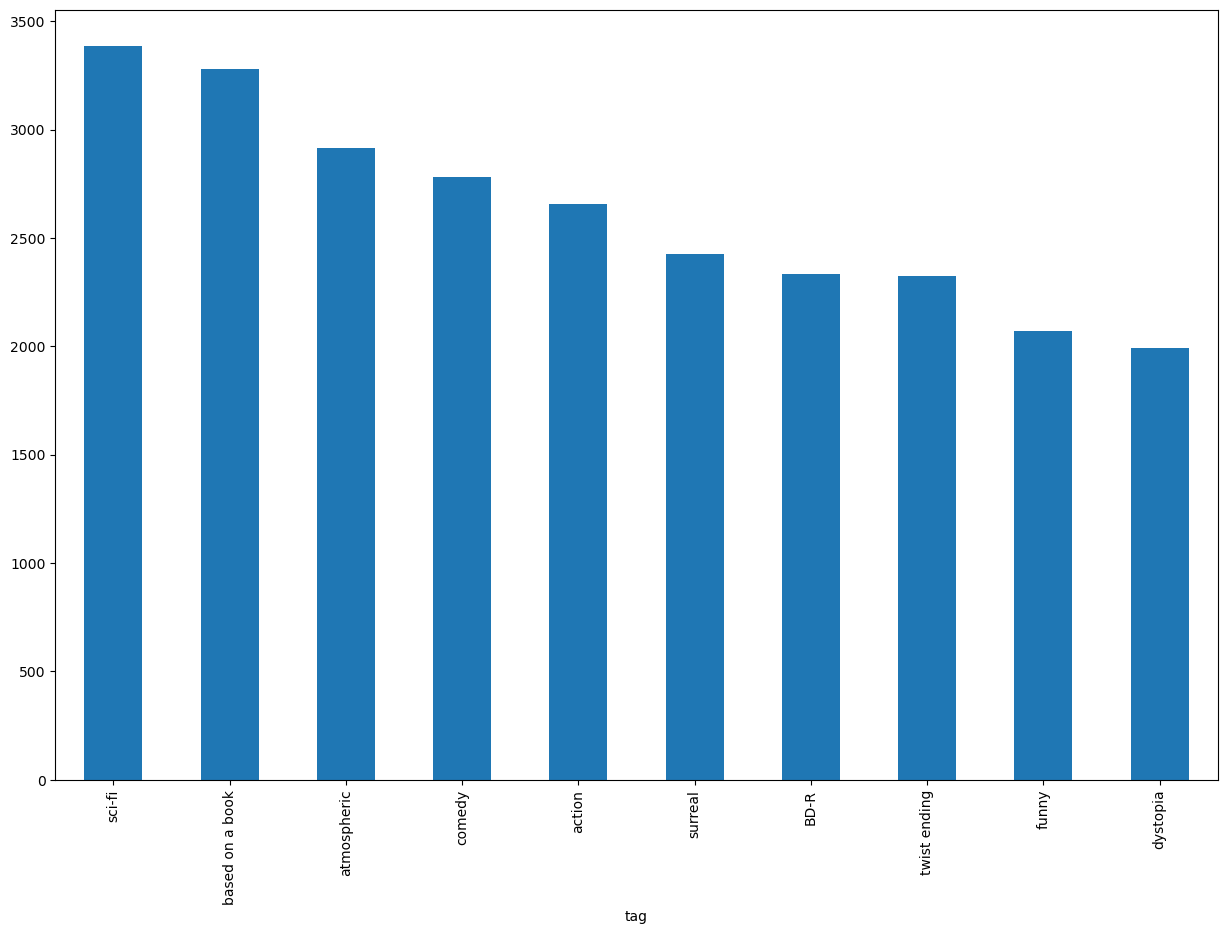

In [112]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [ ]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

In [ ]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

In [ ]:
movies[is_animation].head(15)

In [202]:
ratings

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [114]:
ratings['movieId'].unique()

array([  2,  29,  32,  47,  50, 112, 151, 223, 253, 260, 293, 296, 318,
       337, 367, 541, 589, 593, 653, 919])

In [116]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
3.0,1
3.5,11
4.0,8


In [203]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
2,3.5
29,3.5
32,3.5
47,3.5
50,3.5


In [ ]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

In [ ]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [ ]:
tags.head()

In [ ]:
movies.head()

In [ ]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggreagation, merging, and filters to get useful analytics
</p>

In [204]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [118]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,2,3.5
1,29,3.5
2,32,3.5
3,47,3.5
4,50,3.5


In [205]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
15,541,Blade Runner (1982),Action|Sci-Fi|Thriller,4.0
16,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.5
17,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,3.5
18,653,Dragonheart (1996),Action|Adventure|Fantasy,3.0
19,919,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical,3.5


In [ ]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

In [ ]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

In [ ]:
box_office[is_comedy & is_highly_rated][-5:]

<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [ ]:
movies.head()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [ ]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [ ]:
type(movie_genres)

In [ ]:
movie_genres[:11]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [ ]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [ ]:
movie_genres[:10]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [ ]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [ ]:
movies.tail()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [ ]:
tags = pd.read_csv('./movielens_data/tags.csv', sep=',',  parse_dates=['timestamp'])

In [ ]:
tags.dtypes

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [ ]:
tags.head(5)

In [ ]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [ ]:

tags['parsed_time'].dtype

In [ ]:
tags.head(2)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [ ]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie ratings related to the year of launch?

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

In [ ]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

In [ ]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

In [ ]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the boxoffice movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>